In [1]:
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)

In [2]:
heightData <- read.csv("PearsonHeightData.csv")

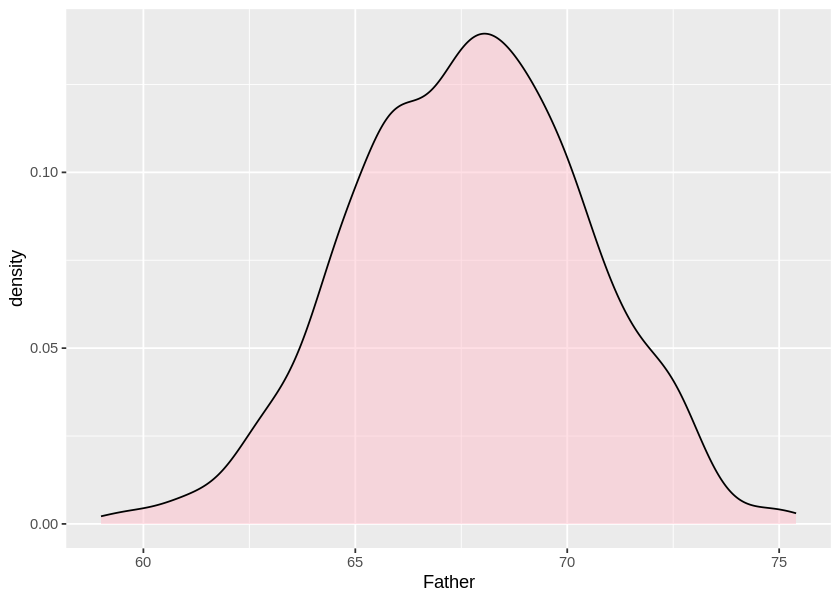

In [9]:
ggplot(heightData, aes(x = Father)) +
  geom_density(fill = "pink", alpha = .5, adjust = 1)

In [10]:
set.seed(666)
pop1 <- rnorm(n = 9000, mean = 0, sd = 1)

In [13]:
set.seed(666)
pop2 <- rnorm(n = 1000, mean = 0, sd = 2.5)

In [14]:
pop_mixed <- c(pop1, pop2)

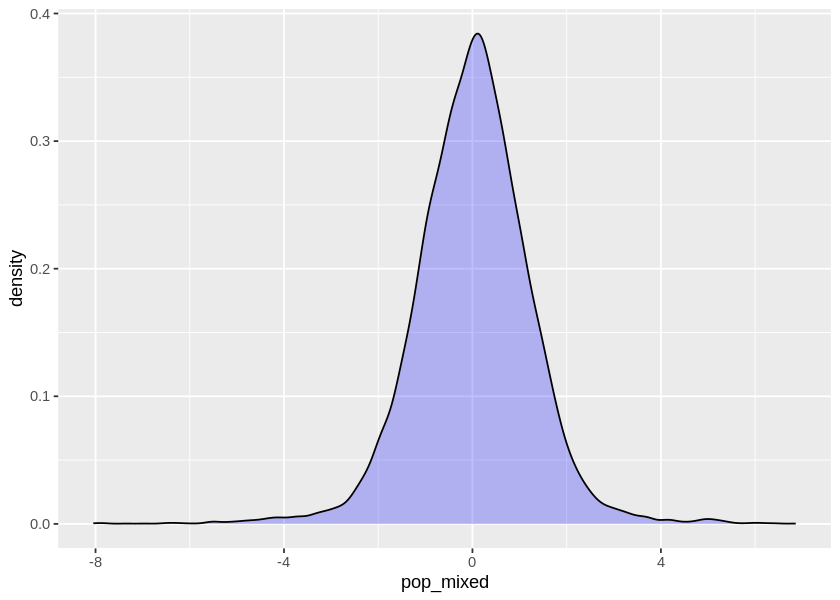

In [17]:
ggplot(mapping = aes(x = pop_mixed)) +
  geom_density(fill = "blue", alpha = 0.25)

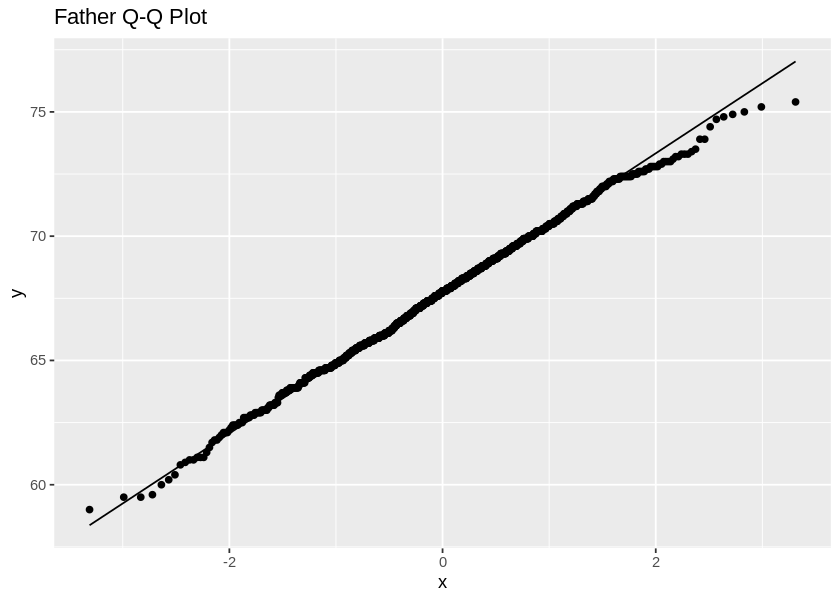

In [18]:
ggplot(heightData, aes(sample = Father)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("Father Q-Q Plot")

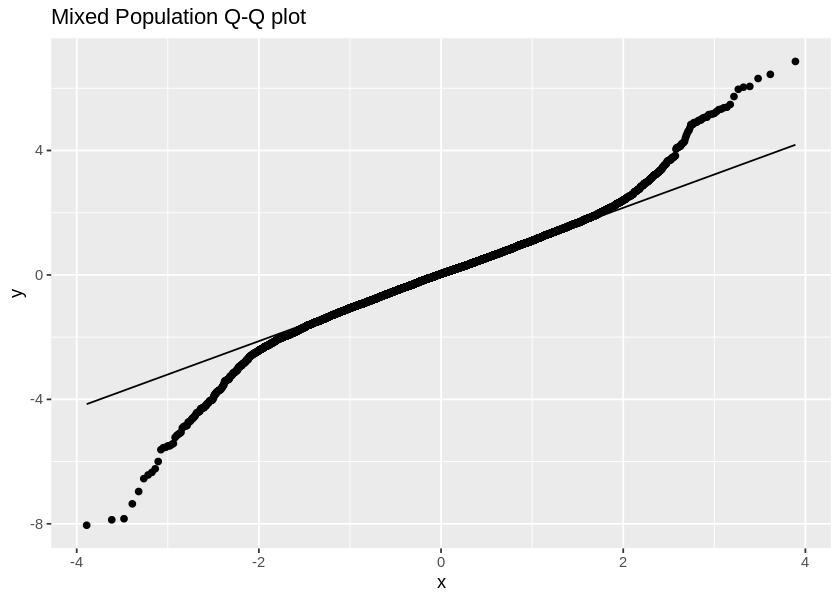

In [19]:
ggplot(mapping = aes(sample = pop_mixed)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("Mixed Population Q-Q plot")

# The Logic of Q-Q Plots

In [20]:
x <- 1:10
y <- 1:10
df <- data.frame(x, y)
df

x,y
<int>,<int>
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


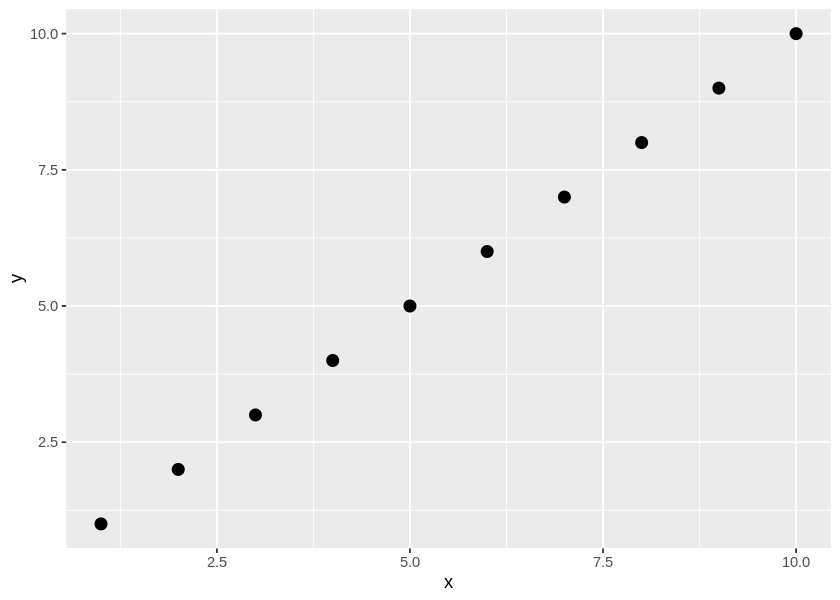

In [21]:
ggplot(df, aes(x = x, y = y)) +
  geom_point(size = 3)

In [23]:
set.seed(1)
observed <- round(rnorm(n = 9, mean = 666, sd = 13))
observed

[1] 658 668 655 687 670 655 672 676 673

# Step 1. Put the data in Order

In [24]:
observed <- sort(observed)
observed

[1] 655 655 658 668 670 672 673 676 687

# Step 2. Calculate the Z-scores for the observed results

In [25]:
observed_z <- (observed - mean(observed)) / sd(observed)

In [26]:
data <- data.frame(observed, observed_z)
data

observed,observed_z
<dbl>,<dbl>
655,-1.24140313
655,-1.24140313
658,-0.95974023
668,-0.02086392
670,0.16691135
672,0.35468661
673,0.44857424
676,0.73023713
687,1.76300108


# Step 3. Determine the expected / theoretical percentiles (or probabilities).

In [30]:
seq(0, 100, length.out = 11)

[1]   0  10  20  30  40  50  60  70  80  90 100

In [32]:
data$percentiles <- seq(0, 100, length.out = 11)[2:10]
data

observed,observed_z,percentiles
<dbl>,<dbl>,<dbl>
655,-1.24140313,10
655,-1.24140313,20
658,-0.95974023,30
668,-0.02086392,40
670,0.16691135,50
672,0.35468661,60
673,0.44857424,70
676,0.73023713,80
687,1.76300108,90


# Step 4. Convert expected percentiles to z-scores

In [33]:
data$expected_z <- qnorm(p = data$percentiles/100, mean = 0, sd = 1)
data

observed,observed_z,percentiles,expected_z
<dbl>,<dbl>,<dbl>,<dbl>
655,-1.24140313,10,-1.2815516
655,-1.24140313,20,-0.8416212
658,-0.95974023,30,-0.5244005
668,-0.02086392,40,-0.2533471
670,0.16691135,50,0.0000000
672,0.35468661,60,0.2533471
673,0.44857424,70,0.5244005
676,0.73023713,80,0.8416212
687,1.76300108,90,1.2815516


# Step 5. Plot the observed z-scores against the expected / theoretical z-scores

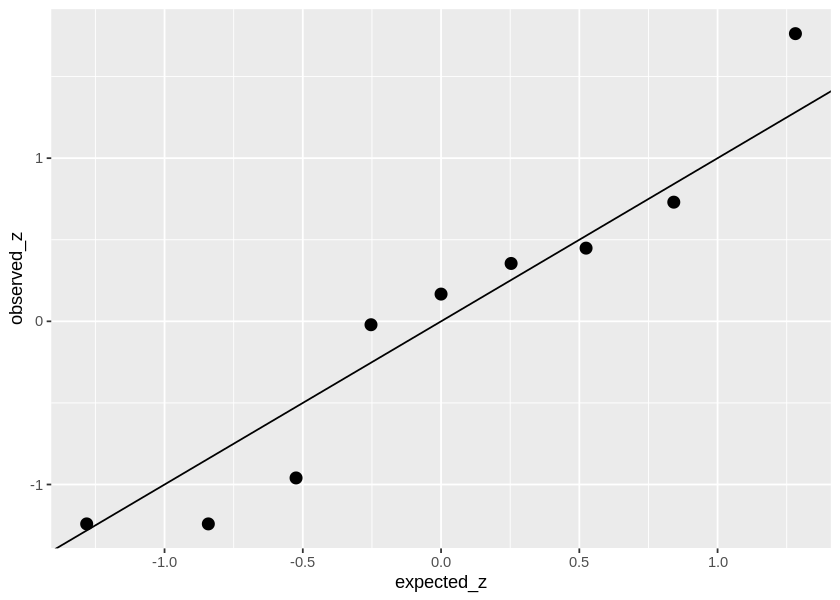

In [34]:
ggplot(data, aes(x = expected_z, y = observed_z)) +
  geom_point(size = 3) +
  geom_abline(intercept = 0, slope = 1)

***

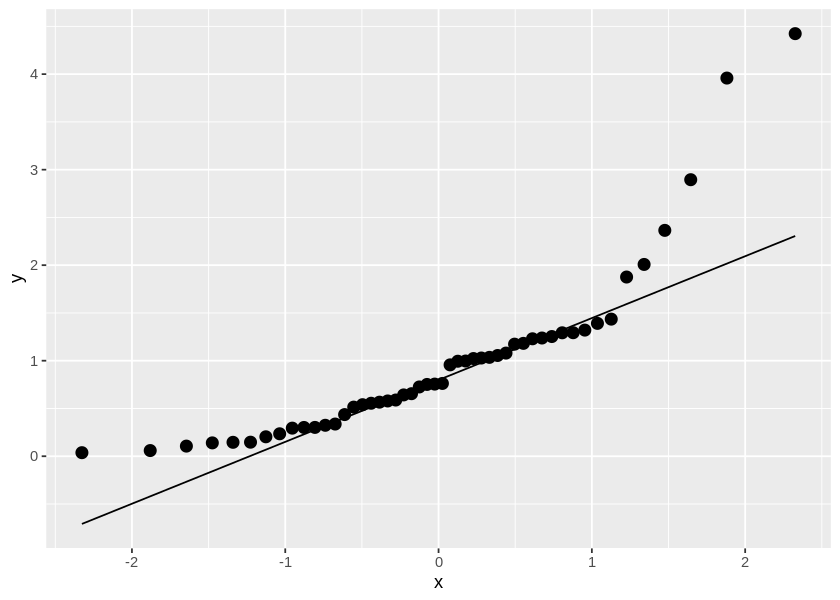

In [37]:
set.seed(1)
non_norm <- rexp(n = 50, rate = 1)

ggplot(mapping = aes(sample = non_norm)) +
  stat_qq(size = 3) +
  stat_qq_line()

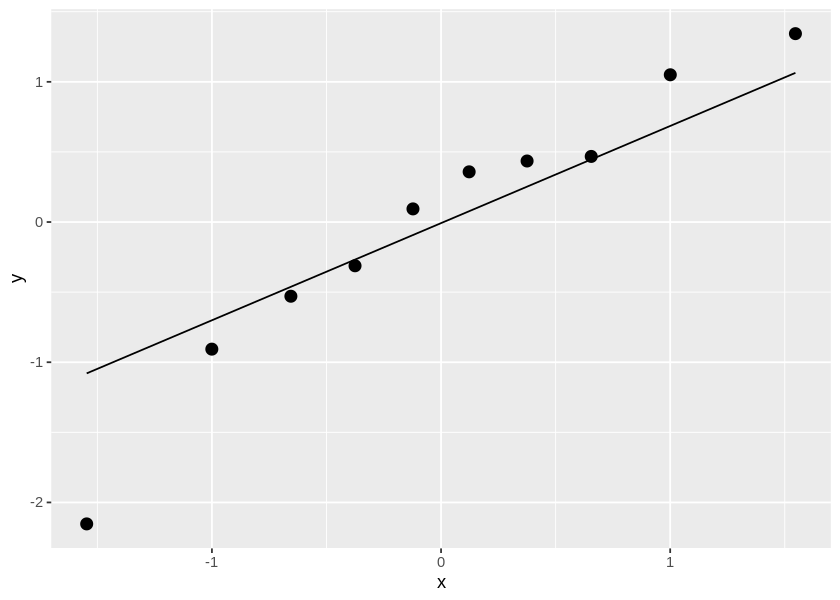

In [53]:
data <- rnorm(n = 10, mean = 0, sd = 1)

ggplot(mapping = aes(sample = data)) +
  stat_qq(size = 3) +
  stat_qq_line()